# **Lab experience #7 (SOLUTION): Design and apply DBSCAN clustering**

This seventh lab session aims **to design and apply the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm** to an unknown matrix of data (with low dimensionality and continuous attributes). This lab session refers to Prof. Stella's lectures no.7 and 8 "Cluster Analysis: DBSCAN", and "Cluster Analysis: Clustering validation".

In this lab, you are going to **(re-)use already developed code**: check solutions of previous labs. Today, you are going to add code to properly select the main parameters of DBSCAN (eps, i.e., the radius, and MinPts, i.e., the minimum number of points required to define a "dense" core region), and to test this particular algorithm. For this lab, you are going to familiarize with a new sklearn function: [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).


**Read the step-by-step instructions below** carefully and write your own code to fill the missing steps.

## Initial notes:
In order to re-use the most of this code for the next lab session, we are going to use the following notation:

> ```
> Kd            = number of clusters for the DBSCAN clustering solution
> dbscan_labels = the labels assigend by the DBSCAN clustering solution
> ```


In [16]:
# Palette to plot a certain number of clusters (BLACK is kept for outliers, so here is NOT included)
PAL = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'magenta', 'cyan', 'brown']

# **Step 1**: Load and visualize the input data, and import useful packages

In this cell, you load **the input data, a 2D matrix synthetically created**. The matrix has M columns (for the attributes or features) and N rows that we assume to represent the collection of objects (also called observations or items).


---
> For the first part, the true number of clusters (Kd) as well as the true labels are _not_ given.
---

---
> In the second part, you will be given with the true labels to complete the lab with supervised validation.
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Load the dataset
# ----------------
X = np.load("Dataset_lab07.npy")
[N,M] = np.shape(X)    # N=no. of objects, M=no. of attributes

print("The matrix has shape = ", np.shape(X))
print('It has %d objects and %d attributes.' % (N, M) )


# Backup copy of the original dataset
raw_data = X

The matrix has shape =  (135, 14)
It has 135 objects and 14 attributes.


# **Step 2**: Normalize the dataset

If you know (or realize) that the attributes describing the dataset assume very different ranges of values, you should normalize them (every single one) using one of the following methods.

In [9]:
# Scaling
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

# StandardScaler: z = (x - u) / s
#
# RobustScaler: it removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
#               The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
# Normalizer:   Each sample (i.e. each row of the data matrix) with at least one non-zero component is rescaled
#               independently of other samples so that its norm (l1, l2 or inf) equals one.
# MinMaxScaler: Transform features by scaling each feature to a given range.
#               X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#               X_scaled = X_std * (max - min) + min
#               scaler = MinMaxScaler(feature_range=(-1, 1))


# Initialize the scaler you want to use
scaler = StandardScaler()

# Apply the scaling to data
X = scaler.fit_transform(raw_data)


# Checkpoint
print(*X[0:9,:].round(2))

[ 0.67 -0.35 -0.95 -0.88  0.13 -0.34 -0.57  0.18 -0.27  0.09 -0.65  0.28
 -0.68 -0.15] [ 0.1  -1.42 -1.   -1.08 -0.05 -0.89 -0.71 -0.55 -0.47 -1.32 -0.18 -0.8
 -0.64 -0.66] [ 0.15 -0.94 -0.91 -0.86  0.41 -0.35 -0.11 -0.36 -0.03 -1.08  0.13 -0.51
 -0.63 -0.41] [ 0.85 -1.29 -1.39 -0.94 -0.1  -0.55 -0.48 -0.83 -0.32 -1.16 -0.72 -0.4
 -0.72 -0.3 ] [ 0.48 -0.53 -0.84 -0.72  0.13 -0.48 -0.38 -0.49 -0.25 -0.62  0.16 -0.2
 -0.62 -0.52] [ 0.23 -0.57 -0.69 -0.28  0.78  0.64 -0.25  0.17  0.05 -0.04  0.5  -0.54
 -0.68  0.03] [ 0.17 -0.72 -0.64 -0.84  0.08 -0.38 -0.96  0.62 -0.74 -0.56 -0.18 -0.64
 -0.67 -0.75] [ 0.13 -0.37 -0.69 -1.16  0.19  0.21 -0.04 -0.7  -0.31  0.11  0.   -0.3
 -0.56  0.05] [ 0.39 -0.77 -0.35 -1.53  0.32 -0.21 -0.58 -0.13 -0.18 -1.3  -0.55 -0.25
 -0.53 -0.16]


# **Step 3**: Visual inspection of the dataset
We have already explored and exploited several ways to visually inspect a new dataset in the previous labs. You can choose one or more among the following methods and implement them to guess some preliminary information from the dataset, before going into the clustering:
1. Plot the dataset in a 2D image with the colorbar, axes labels, and proper axes ticks
2. Compute the proximity matrix
3. Plot the proximity matrix as an image (check the new utility function called ```proximity_matrix```)
4. Scatterplot using two attributes. For this, check the new utility function called ```scatter_clustering_solution```
5. Apply PCA/tSNE and visualize the data points in 2D to guess if clusters exist. Note: as you don't have labels at this point, use the usual "trick" of previous labs to assign all data points the same numerical label.

In [54]:
# Visualization(s) of the dataset
fig1 = plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

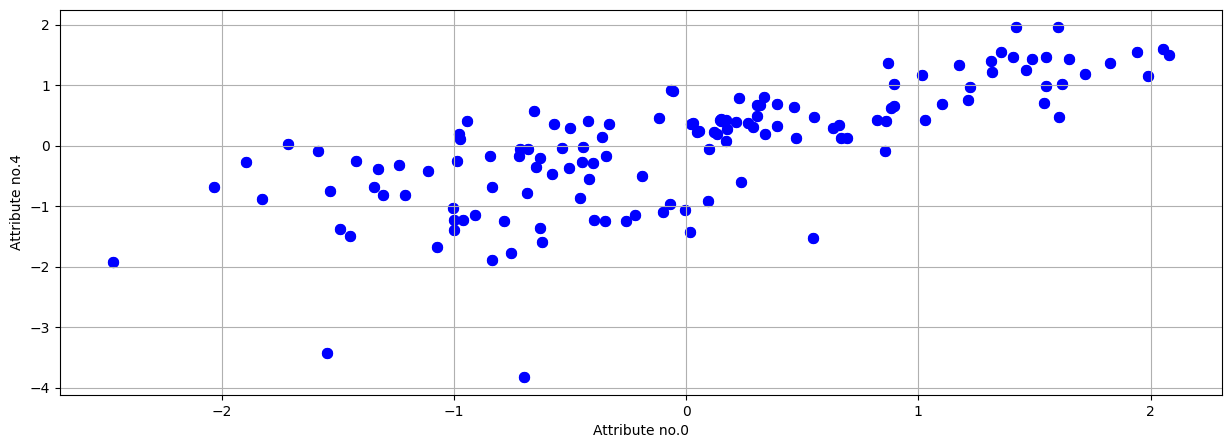

In [67]:
# 1. Plot the dataset in a 2D image with the colorbar. Hint: see solutions to Lab01-Lab06.
feat1 = 0
feat2 = 4
scatter_clustering_solution(X, feat1, feat2, np.zeros(N), PAL, fig1)
plt.show()

In [51]:
# 2. Compute the proximity matrix
distance_metric = 'euclidean'
PM              = proximity_matrix(X, distance_metric)

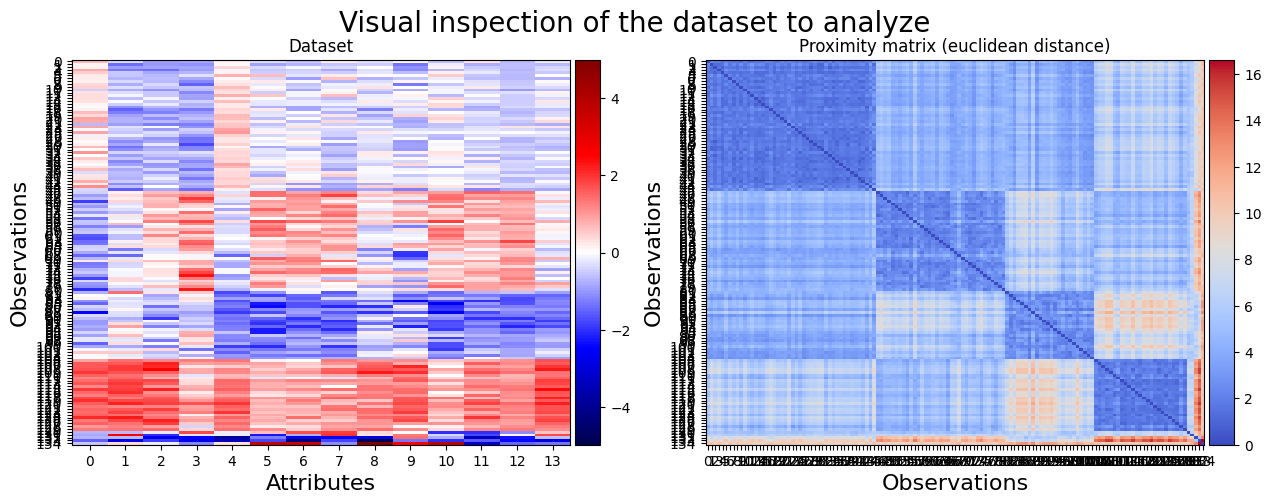

In [57]:
# 3. Plot the proximity matrix as an image (you can add a subplot to fig1)
plt.style.use('default')
from mpl_toolkits.axes_grid1 import make_axes_locatable   #to adjust the colorbar

fig2 = plt.figure(figsize=(15,5))
fig2.suptitle('Visual inspection of the dataset to analyze', fontsize=20)


# Plot 1: 2D image of the entire dataset
ax1 = fig2.add_subplot(121)
im1 = ax1.imshow(X, interpolation='nearest', aspect='auto', cmap='seismic')

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)

ax1.set_xlabel('Attributes', fontsize=16)
ax1.set_xticks(np.arange(0, M, step=1))     #ALTERNATIVE: plt.xticks(np.arange(3), ['1', '2', '3'])
ax1.set_ylabel('Observations', fontsize=16)
ax1.set_yticks(np.arange(0, N, step=1))
ax1.title.set_text('Dataset')


# Plot 2: proximity matrix
ax2 = fig2.add_subplot(122)
im2 = ax2.imshow(PM, interpolation='nearest', aspect='auto', cmap='coolwarm')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax)

ax2.set_xlabel('Observations', fontsize=16)
ax2.set_xticks(np.arange(0, N, step=1))
ax2.set_ylabel('Observations', fontsize=16)
ax2.set_yticks(np.arange(0, N, step=1))
ax2.title.set_text('Proximity matrix (%s distance)' % distance_metric)

plt.show()

PCA: explained variation per principal component: [0.6  0.12 0.08 0.05 0.03]

Applying tSNE...


<ipython-input-12-76933469a680>:40: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-12-76933469a680>:47: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


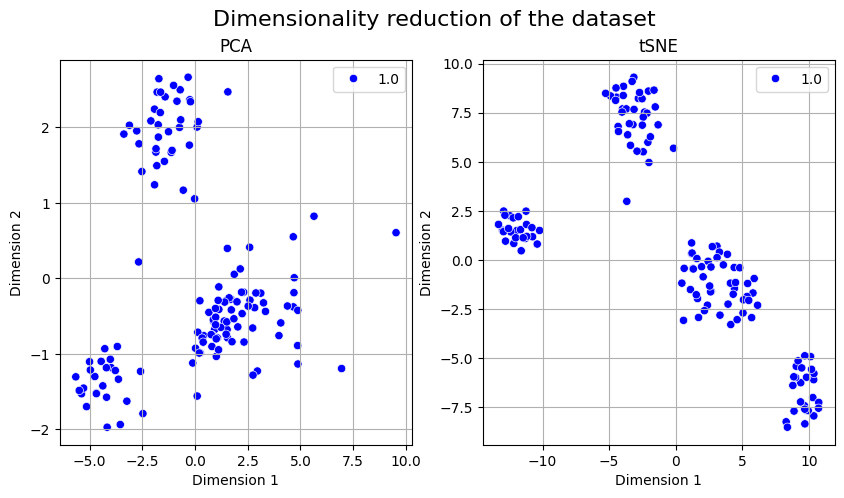

In [60]:
# Now, you can run the following line
PCA_tSNE_visualization(X, 5, np.ones(N), PAL)

**Note.** By visual inspection, we can expect 3-4 clusters.

# **Step 4**: NAIVE design and application of DBSCAN clustering algorithm

1. Choose the parameters:
* choose a numerical value for **eps** (= epsilon)
* choose another numerical value for **min_samples** (= MinPts)
* use the default distance metric, i.e., Euclidean


In [61]:
# Import useful packages for clustering
from sklearn.cluster import DBSCAN

In [62]:
# Randomly choose the parameters to run DBSCAN clustering
EPS             = 2
MINSAMPLES      = 10
distance_metric = 'euclidean'


2. Apply the algorithm in a naive way. You can use the following lines of code:

> ```
>  dbscan = DBSCAN(eps=EPS, min_samples=MINSAMPLES, metric=distance_metric)
>  dbscan.fit(X)
> ```

Attributes (outputs of this function):
* ```core_sample_indices_``` is an ndarray of shape (n_core_samples,) including the indices of core samples
* ```components_``` is an ndarray of shape (n_core_samples, n_features) representing a copy of each core sample found by training.
* ```labels_``` is an ndarray of shape (n_samples) with the cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

In [63]:
# Apply the algorithm in a naive way
db = DBSCAN(eps=EPS, min_samples=MINSAMPLES, metric=distance_metric).fit(X)

# Retrieve the labels
labels = db.labels_

# Checkpoint
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1]


With this parameters setting, we obtain 3 clusters (represented by labels=0,1,2) and some noise points (represented with label=-1).

3. Visualize and evaluate the results. Particularly, retrieve the number of clusters formed by DBSCAN (Kd), the number of core/border/noise points. For the visualization, again, you have multiple possibilities.

```
Did you expect that classification?
Did you expect those particular samples to be outliers?
```

In [64]:
# Find out the number of core/border/noise points. Hint: remeber that noise points have their own "label". However, that should not be counted in the number of clusters.
unique_labels = np.unique(labels)
Kd            = len(unique_labels) - 1                  # subtract 1 for noise points (if you are sure that noise points exist). Alternatively, you can use: - (1 if -1 in labels else 0)
corep         = np.size(db.core_sample_indices_)
noisep        = list(labels).count(-1)
boardp        = N - corep - noisep

print("Estimated number of clusters: %d" % Kd)
print("In total, there should be %d core points and %d border points." % (corep,boardp))
print("Estimated number of noise points: %d." % noisep)

Estimated number of clusters: 3
In total, there should be 80 core points and 19 border points.
Estimated number of noise points: 36.


PCA: explained variation per principal component: [0.6  0.12 0.08 0.05 0.03]

Applying tSNE...


<ipython-input-12-76933469a680>:40: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-12-76933469a680>:47: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


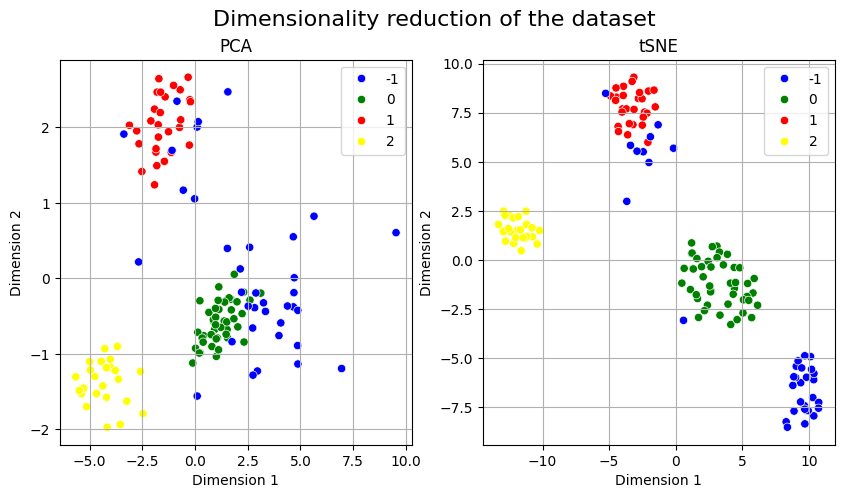

In [65]:
PCA_tSNE_visualization(X, 5, labels, PAL)

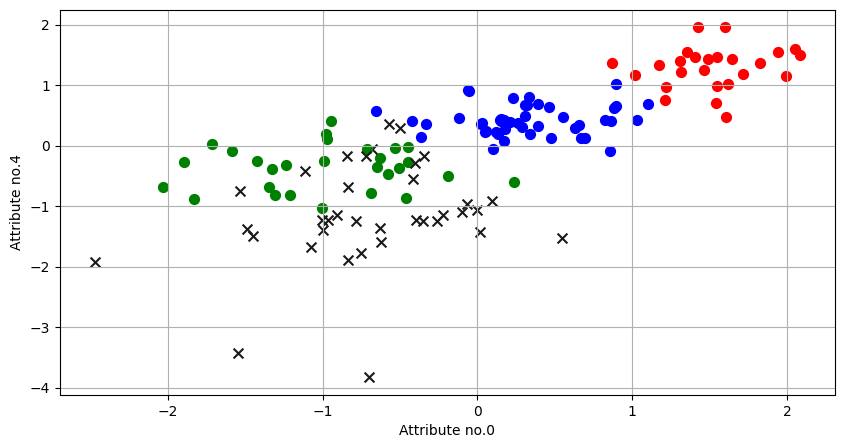

In [68]:
# Visualize using two attributes (feat1 and feat2) the data points with a color corresponding to the cluster assigned by DBSCAN, or in black if they are "noise"
fig3 = plt.figure(figsize=(10,5))
scatter_clustering_solution(X, feat1, feat2, labels, PAL, fig3)
plt.show()

DISCLAIMER:
This step is to start familiarizing with the code for DBSCAN and to realize that you need a smarter way to choose epsilon and min_samples (minPts).

Then, let's apply the knee method..

# **Step 5**: Design and apply the DBSCAN clustering (using the "knee point")

1. Apply the "knee method" to find the "knee point":

```
a) set k, as the k-th nearest neighbour to compute the max distance from a core point
b) compute the distance of every point from its own k-th nearest neighbour. Hint: use the knn package.
c) sort objects by ascending value of the previous distances
d) plot distance vs objects (sorted)
e) identify the "knee point"
f) set rstar (r*), i.e., the optimal candidate radius value for the parameter eps.
```

Hints:
- for a) and b), use the knn package (see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

- To find the K-neighbors of a point and return distance, use method ```kneighbors``` with the following syntax: kneighbors(X, n_neighbors=None, return_distance=True). Read documentation [here](https://scikit-learn.org/0.15/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.fit).

- in choosing the value of k, remind that the 1st nearest neighbour is the point itself.

- to find the knee point, you can use the ```kneed``` package. If you got an error while importing it, use the following command to install it here: ```!pip install kneed```

_Reference for this package: Satopaa, V., Albrecht, J., Irwin, D., & Raghavan, B., “Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior”, 31st IEEE international conference on distributed computing systems workshops, pp. 166-171, 2011._

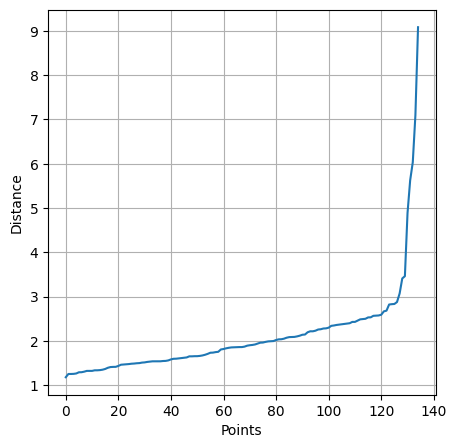

In [69]:
# Apply KNEE METHOD to decide the optimal candidate for the eps parameter
from sklearn.neighbors import NearestNeighbors as knn

neighborhood_order = MINSAMPLES                                         # this number should be coherent with the MINSAMPLES parameter
neighborhood_set   = knn(n_neighbors=neighborhood_order).fit(X)         # Note that in the nearest neighbour calculation, the point itself will appear as the first nearest neighbour

distances, indices = neighborhood_set.kneighbors(X)                     # to find the K-neighbors of a point and return distances
distances          = np.sort(distances[:,neighborhood_order-1], axis=0)
# Note: since the nearest neighbour is the point itself, we sort the distances from each point to their 3rd nearest neighbour.

fig4 = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

In [70]:
# To find the "knee"
# !pip install kneed                   # run this line only the first time you run this cell
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
# To list all methods of this object, you can use: dir(knee)

knee_x = knee.knee
knee_y = knee.knee_y    # OR: distances[knee.knee]
print('The estimated best eps value is = %.2f' % knee_y)

# REF for this Python package:
# Satopaa, V., Albrecht, J., Irwin, D., & Raghavan, B., “Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior”, ...
#                                                       31st IEEE international conference on distributed computing systems workshops, pp. 166-171, 2011.

The estimated best eps value is = 2.57


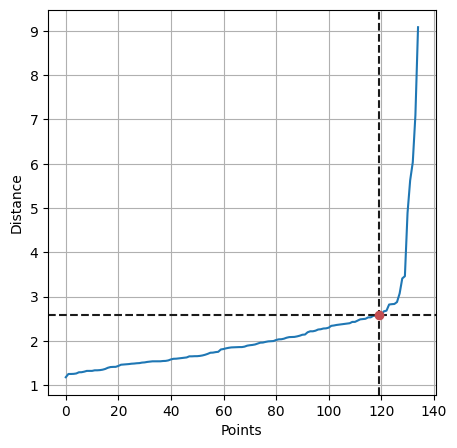

In [71]:
# Add a vertical line to indicate the "knee" (i.e., chosen eps)
plt.figure(fig4)
plt.axvline(x=knee_x, color='k', linestyle='--')
plt.axhline(y=knee_y, color='k', linestyle='--')
plt.plot((knee_x), (knee_y), 'o', color='r')
plt.show()

2. Knee method: now, properly choose the epsilon value (name it EPS_KNEE).

In [72]:
# Set the optimal eps.
EPS_KNEE = knee_y

3. Apply DBSCAN again.

In [73]:
# Apply the clustering
dbscan = DBSCAN(eps=EPS_KNEE, min_samples=MINSAMPLES, metric=distance_metric).fit(X)

# Retrieve the labels
dbscan_labels = dbscan.labels_

# Checkpoint
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1]


**Note.** This new result seems much better: 3 clusters and a few outliers (represented by label=-1).

# **Step 6**: Validate the DBSCAN clustering solution



1. Visualize the solution and compare it with the previous one.

In [74]:
# Find out the number of core/border/noise points. Hint: remember that noise points have their own "label". However, that should not be counted in the number of clusters.
unique_labels = np.unique(dbscan_labels)
Kd            = len(unique_labels) - 1                  # subtract 1 for noise points (if you are sure that noise points exist). Alternatively, you can use: - (1 if -1 in labels else 0)
corep         = np.size(dbscan.core_sample_indices_)
noisep        = list(dbscan_labels).count(-1)
boardp        = N - corep - noisep

print("Estimated number of clusters: %d" % Kd)
print("In total, there should be %d core points and %d border points." % (corep,boardp))
print("Estimated number of noise points: %d." % noisep)

Estimated number of clusters: 3
In total, there should be 119 core points and 11 border points.
Estimated number of noise points: 5.


PCA: explained variation per principal component: [0.6  0.12 0.08 0.05 0.03]

Applying tSNE...


<ipython-input-12-76933469a680>:40: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-12-76933469a680>:47: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


<Figure size 1000x500 with 0 Axes>

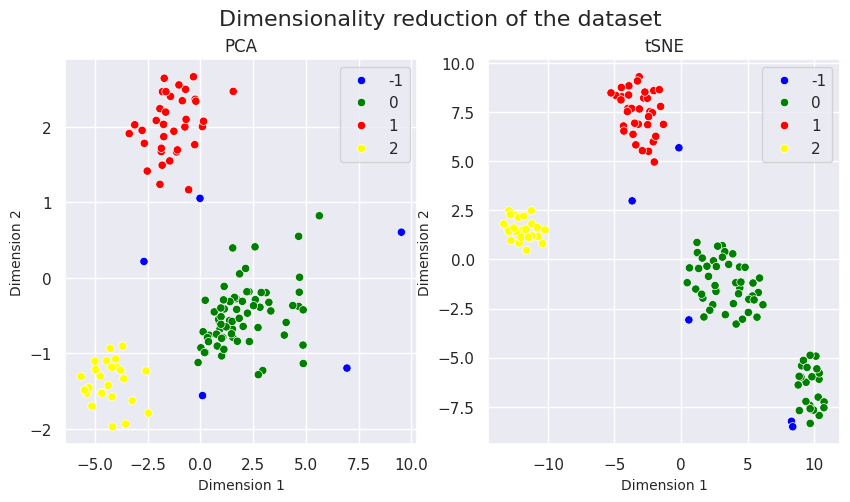

In [82]:
# Visualize the clustering solution (using the color palette and markers as above)
fig6a = plt.figure(figsize=(10,5))
# scatter_clustering_solution(X, feat1, feat2, dbscan_labels, PAL, fig6a)
PCA_tSNE_visualization(X, 5, dbscan_labels, PAL)

2. Use one or more measures/strategies to validate a clustering solution, and apply it/them to evaluate the performance of the DBSCAN output (e.g., inter-cluster distances, silhouette score, ...).

3 centroids are being computed, as we have 3 clusters.
The centroid of cluster 0 has coordinates:  -0.01 -0.5 -0.65 -0.66 -0.17 -0.63 -0.58 -0.68 -0.4 -0.52 -0.58 -0.59 -0.76 -0.57
The centroid of cluster 1 has coordinates:  -0.94 -0.17 0.37 1.0 -0.37 0.82 0.73 0.73 -0.03 -0.08 0.77 0.68 0.94 -0.0
The centroid of cluster 2 has coordinates:  1.52 1.67 1.57 0.65 1.29 0.65 0.72 0.93 1.24 1.39 0.61 1.19 1.11 1.71

We need to compute 3 centroids, as we have 3 clusters.


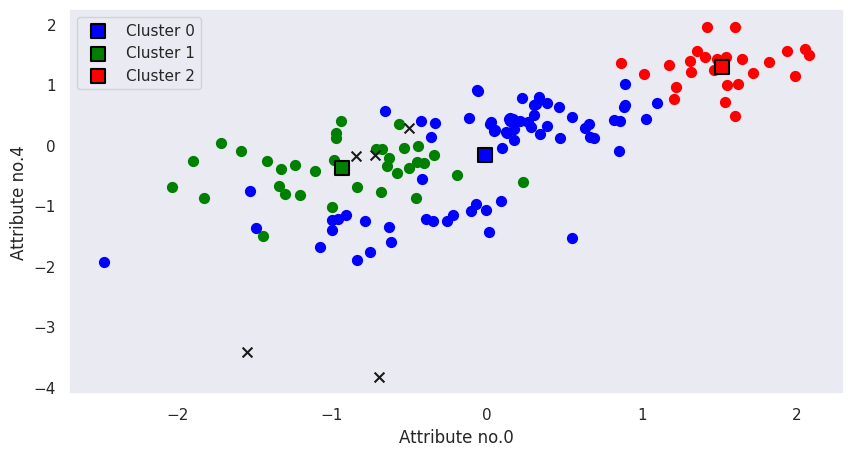

In [87]:
# Find clusters centers. Hint: utility function below
centers = find_cluster_centers(X, Kd, dbscan_labels)
print("\nWe need to compute %d centroids, as we have %d clusters." % (Kd, Kd) )


# Plots
fig6b = plt.figure("Scatterplot with clusters", figsize=(10,5))
scatter_clustering_solution(X, feat1, feat2, dbscan_labels, PAL, fig6b)
for k in range(Kd):
   plt.scatter(x=centers[k,feat1], y=centers[k,feat2], s=100, marker='s', edgecolor='black', linewidth=1.5, color=PAL[k], label=("Cluster %d" % k))
plt.legend()
sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat1)
plt.ylabel('Attribute no.%s' % feat2)
plt.grid()
plt.show()

In [88]:
# Compute intra-/inter-cluster distances
[d, D] = intra_inter_cluster_distances(X, Kd, dbscan_labels, centers, distance_metric)

The intra-cluster distance of the clusters are:  [3.   2.6  1.92]

All pair-wise inter-cluster distances:
 [[0.   4.2  6.43]
 [4.2  0.   4.56]
 [6.43 4.56 0.  ]]


In [89]:
# Silhouette score
from sklearn.metrics import silhouette_score
Sd = silhouette_score(X, dbscan_labels, metric=distance_metric)
print("With DBSCAN clustering, we found an optimal number of clusters equal to Kd=%d with a silhouette score of S=%.3f." % (Kd, Sd))

With DBSCAN clustering, we found an optimal number of clusters equal to Kd=3 with a silhouette score of S=0.417.


In [98]:
# Correlation coefficient between the ideal similarity matrix (DBSCAN) and the proximity matrix (dataset)

# a) Build the ideal similarity matrix for DBSCAN clustering (db)
SM_db = np.eye(N)
for i in range(0, dbscan_labels.size):
   for j in range(0, dbscan_labels.size):
       if dbscan_labels[i] == dbscan_labels[j]:
        SM_db[i,j] = 1
        SM_db[j,i] = 1

# b) Compute the correlation between the ideal similarity matrix and the proximity matrix
PM_values = PM[np.triu_indices_from(PM, k=1)]
SM_db_values = SM_db[np.triu_indices_from(SM_db, k=1)]
ro_db = np.abs( np.corrcoef(PM_values, SM_db_values)[0,1].round(2))

# Output
print('For this DBSCAN clustering solution (with %d clusters),' % Kd, 'we obtain a cross-correlation of %.2f.' % ro_db )

For this DBSCAN clustering solution (with 3 clusters), we obtain a cross-correlation of 0.66.


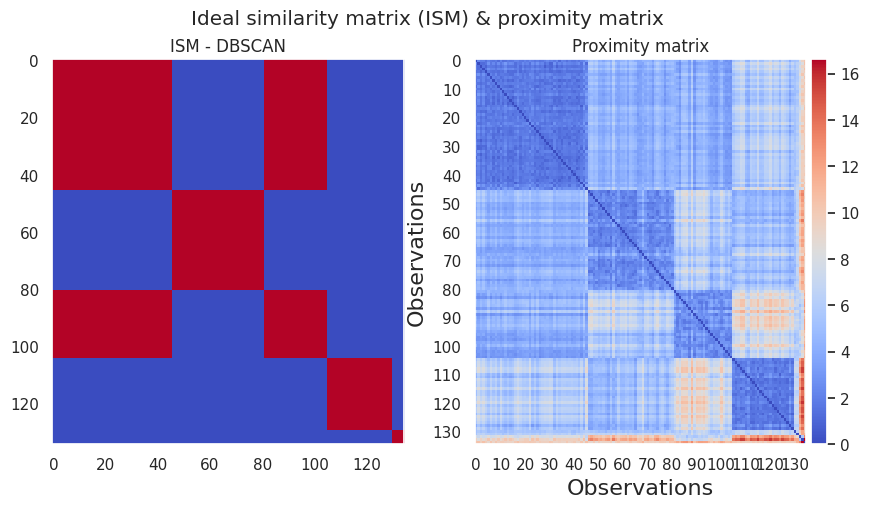

In [92]:
# Visualization and outputs
fig7 = plt.figure(figsize=(10,5))
fig7.suptitle('Ideal similarity matrix (ISM) & proximity matrix')

ax1 = fig7.add_subplot(121)
ax1.imshow(SM_db, interpolation='nearest', aspect='auto', cmap='coolwarm')
ax1.title.set_text('ISM - DBSCAN')

ax2 = fig7.add_subplot(122)
im2 = ax2.imshow(PM, interpolation='nearest', aspect='auto', cmap='coolwarm')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax)
ax2.set_xlabel('Observations', fontsize=16)
ax2.set_xticks(np.arange(0, N, step=10))
ax2.set_ylabel('Observations', fontsize=16)
ax2.set_yticks(np.arange(0, N, step=10))
ax2.title.set_text('Proximity matrix')
plt.show()

**Notes**. The silhouette score as well as the correlation coefficient are not so high, possibly leading to the conclusion that DBSCAN did not do a great job.

However, the comparison between the ideal similarity matrix with the proximity matrix, and the values of the intra-cluster and inter-cluster distances tell a different story that might induce us to do another check step.

Let's remove the outliers (noise points identified by DBSCAN) from both the ideal similarity matrix and the proximity matrix. Then, compute the correlation coefficient again.

In [93]:
# Reduced dataset (outliers removed)
noise_ind = np.array( np.where(dbscan_labels==-1) )

PM_red    = np.delete(PM, noise_ind, axis=0)
PM_red    = np.delete(PM_red, noise_ind, axis=1)

SM_db_red = np.delete(SM_db, noise_ind, axis=0)
SM_db_red = np.delete(SM_db_red, noise_ind, axis=1)

In [95]:
# Compute the correlation between the ideal similarity matrix and the proximity matrix
PM_red_values = PM_red[np.triu_indices_from(PM_red, k=1)]
SM_db_red_values = SM_db_red[np.triu_indices_from(SM_db_red, k=1)]
ro_db_red = np.abs( np.corrcoef(PM_red_values, SM_db_red_values)[0,1].round(2))
print('For this DBSCAN clustering solution (with %d clusters), \nafter removing %d outliers (i.e., %.1f%% of the entire dataset), \nwe obtain a' % (Kd, noisep, noisep/N*100), 'cross-correlation of %.2f.' % ro_db_red )

For this DBSCAN clustering solution (with 3 clusters), 
after removing 5 outliers (i.e., 3.7% of the entire dataset), 
we obtain a cross-correlation of 0.69.


Then, just removing a few points, identified by DBSCAN as outliers, we could increase the correlation coefficient.

Given the above, you might run DBSCAN again removing those points. Alternatevely, you can decide to run another type of clustering excluding outliers.

**SUPERVISED VALIDATION**
This additional section is intended to appreciate some more aspects of the application of DBSCAN to this particular dataset. Here, I also give you the "expert labels" (i.e., the groundtruth), in order to apply also some supervised measures for the validation.

The "expert labels" are listed in the file "TRUElabels_lab07.npy".


In [99]:
# Load the true labels
TRUElabels_lab07 = np.load("TRUElabels_lab07.npy")

Compare labels assignment between groundtruth and DBSCAN algorithm. We have already seen different ways to implement this step in previous labs (e.g., plot labels from the clustering solution and the true labels as lines in the same plot, adjusted Rand index).

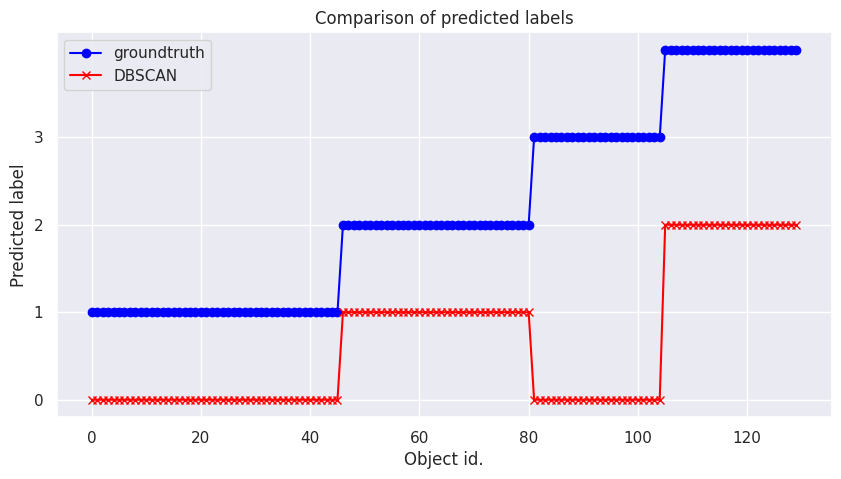

In [100]:
# Computations/visualizations
TRUEnoisepts = np.array( np.where(TRUElabels_lab07==-1) )
y0           = np.delete(TRUElabels_lab07, TRUEnoisepts, axis=0)  # TRUE labels
y1           = np.delete(dbscan_labels, TRUEnoisepts, axis=0)     # DBSCAN labels
L = len(y0)

fig20 = plt.figure('Comparison of predicted labels', figsize=(10,5))
plt.plot(y0, color='blue', marker="o", label='groundtruth')
plt.plot(y1, color='red', marker="x", label='DBSCAN')
plt.xlabel('Object id.')
plt.yticks(np.arange(0,Kd+1))
plt.ylabel('Predicted label')
plt.title("Comparison of predicted labels")
plt.legend()
plt.grid()
plt.show()

**Note** that DBSCAN found 3 clusters, when the actual number of clusters was 4.

PCA: explained variation per principal component: [0.64 0.15 0.09 0.03 0.02]

Applying tSNE...


<ipython-input-12-76933469a680>:40: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-12-76933469a680>:47: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


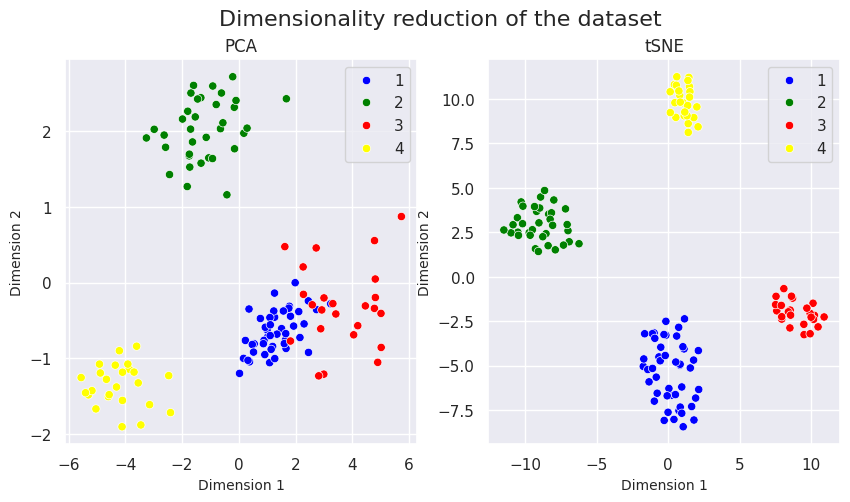

PCA: explained variation per principal component: [0.64 0.15 0.09 0.03 0.02]

Applying tSNE...


<ipython-input-12-76933469a680>:40: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-12-76933469a680>:47: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


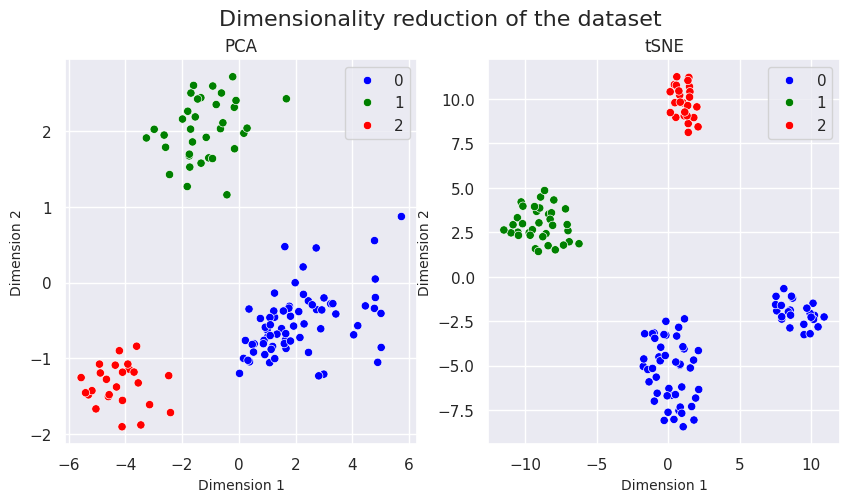

In [106]:
PCA_tSNE_visualization(np.delete(X, TRUEnoisepts, axis=0), 5, y0, PAL) # TRUE labels
PCA_tSNE_visualization(np.delete(X, TRUEnoisepts, axis=0), 5, y1, PAL) # DBSCAN labels

Giving access to the true labels of the clusters, it is possible to use evaluation metrics that leverage this “supervised” ground truth information to quantify the quality of the resulting clusters. Examples of such metrics are the homogeneity, completeness, V-measure, Rand-Index, Adjusted Rand-Index and Adjusted Mutual Information (AMI).

In [102]:
from sklearn import metrics
print("For the DBSCAN clustering solution:")
print(f"Homogeneity: {metrics.homogeneity_score(y0, y1):.3f}")
print(f"Completeness: {metrics.completeness_score(y0, y1):.3f}")
print(f"V-measure: {metrics.v_measure_score(y0, y1):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y0, y1):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(y0, y1):.3f}")

For the DBSCAN clustering solution:
Homogeneity: 0.744
Completeness: 1.000
V-measure: 0.853
Adjusted Rand Index: 0.707
Adjusted Mutual Information: 0.850


**Notes.** From the supervised validation, we realized that DBSCAN did a good job. Actually, the main problem is that DBSCAN aggregated two separated clusters into a single one, as visible from the PCA/tSNE plots. Possible solutions to this under-performance are: (1) to run again DBSCAN with different parameters to find 4 clusters (as suspected from the initial tSNE plot), (2) to transform the dataset using PCA/tSNE, then apply clustering on the top of that, and finally return to the original dataset to assign labels to the original datapoints.

# _This it the end of Lab session #7_ ✅


---------------------------------------------------------------------------

---------------------------------------------------------------------------

Utility functions
-------------------

In [85]:
# NEW METHOD
def scatter_clustering_solution(X, feat1, feat2, labels, PAL, fighandle):
    plt.figure(fighandle)

    for l in range(0, np.size(labels)):
      if labels[l] == -1:
          # Plot noise points in black with cross marker
          plt.scatter(X[l, feat1], X[l, feat2], c='k', marker='x', s=50) #, label='Noise')
      else:
          # Plot points in current cluster color
          plt.scatter(X[l, feat1], X[l, feat2], c=PAL[int(labels[l])], s=50)

    plt.xlabel('Attribute no.%d' % feat1)
    plt.ylabel('Attribute no.%d' % feat2)
    plt.grid('on')
    # plt.show()

In [11]:
# [FROM SOLUTION OF PREVIOUS LABS] THIS IS A **METHOD** TO COMPUTE THE PROXIITY MATRIX

def proximity_matrix(data, distance_metric):

  '''
  INPUT
  data             - dataset for which to compute the proximity matrix
  distance_metric  - distance metric to use in the computation. You can choose one among the following: 'euclidean', 'minkowski', 'mahalanobis',  'hamming'/'matching', 'jaccard', 'cosine', 'correlation'.
  '''

  '''
  OUTPUT
  PM: the square proximity matrix
  '''

  # Proximity matrix: to have an idea of how "similar" are the objects in the dataset
  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf

  PM = pdist(X, metric=distance_metric)
  PM = sf(PM).round(2)

  return PM

In [12]:
# [FROM SOLUTION OF LAB#4] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find visualize data in 2D with clusters in different colours

def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):

  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''

  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''


  # PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  from sklearn.manifold import TSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)


  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)


  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.grid()
  plt.show()

In [78]:
# [FROM SOLUTION OF LAB#2] THIS IS A **METHOD** THAT YOU CAN USE TO find cluster centers

def find_cluster_centers(data, K, labels):

  '''
  INPUT
  data    - data matrix for which to compute the proximity matrix
  K       - the expected number of clusters
  labels  - predicted labels from the clustering solution applied to data
  '''

  '''
  OUTPUT
  cluster_centers   - cluster centres from the clustering solution applied to data
  '''

  # Initialize the output
  cluster_centers = np.zeros((K, np.shape(data)[1]))   # np.shape(data)[1] = no. of attributes

  print("%d centroids are being computed, as we have %d clusters." % (K, K) )

  for k in range(0, K):
    ind = np.array( np.where( labels == k ) )
    cluster_points = data[ind, :][0]
    cluster_centers[k,:] = np.mean(cluster_points, axis=0) # cluster_points.mean(axis=0)
    print("The centroid of cluster %d has coordinates: " % (k), *cluster_centers[k,:].round(2))

  return cluster_centers

In [13]:
# [FROM SOLUTION OF LAB#3] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO compute the intra- and inter-cluster distances

def intra_inter_cluster_distances(data, K, labels, cluster_centers, distance_metric):

  '''
  INPUT
  data            - data matrix for which to compute the proximity matrix
  K               - the expected number of clusters
  labels          - predicted labels from the clustering solution applied to data
  cluster_centers - cluster centres from the clustering solution applied to data
  distance_metric - metric to compute the distances within and between clusters. Here, you use the same metric for both measurements (but it might be possible to use two different metrics)
  '''

  '''
  OUTPUT
  d               - intra-cluster distance
  D               - inter-cluster distances
  '''

  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf


  # Intra-cluster distances (average over all pairwise distances) ----------------- NOTE: bug fixed here!
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll pair-wise inter-cluster distances:\n", D)

  return d, D

--------------------------------------------------------------